In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prosper-loan/prosperLoanData.csv


# **Loading the prosper loan data**
​
We now know that we are working with a typical CSV file (i.e., the delimiter is ,, etc.). We proceed to loading the data into memory.

In [2]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load dataset
# above .csv file is comma delimited
df = pd.read_csv('../input/prosper-loan/prosperLoanData.csv')

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.shape

(113937, 81)

In [7]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
#We want a summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

We can observe that those columns that have symbols are in object form as well as some columns should be of an integer type but are of an object type. Now let us detect which columns have symbols and if there are any other symbols too.

In [9]:
#telling about certain statistics of each column
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# **What is the structure of your dataset?**

There are 113,937 loans in the dataset with 81 features. Most variables are numeric and categorical in nature.

The dataset features can be split into two main categories:

1) Borrower information

2) Loan performance information

# **What features in the dataset do you think will help support your investigation into your feature(s) of interest**

Though there are many features to explore, I suspect the following borrower features will have the largest effect on the performance of the loan:

IncomeRange - The income range of the borrower at the time the listing was created.

DebToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

Investors - The number of investors that funded the loan.

EstimatedReturn - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. This is on an annual percentage rate (APR).



In [10]:
# Subset the dataframe by selecting features of interest
cols = ['IncomeRange', 'DebtToIncomeRatio', 'CreditGrade', 'IsBorrowerHomeowner', 'ProsperRating (Alpha)', 'Investors','EstimatedReturn']
features_interest = df[cols]

In [11]:
features_interest.head()

,IncomeRange,DebtToIncomeRatio,CreditGrade,IsBorrowerHomeowner,ProsperRating (Alpha),Investors,EstimatedReturn
0,"$25,000-49,999",0.17,C,True,NaN,258,NaN
1,"$50,000-74,999",0.18,NaN,False,A,1,0.05470
2,Not displayed,0.06,HR,False,NaN,41,NaN
3,"$25,000-49,999",0.15,NaN,True,A,158,0.06000
4,"$100,000+",0.26,NaN,True,D,20,0.09066


In [12]:
features_interest.isnull().sum()

IncomeRange                  0
DebtToIncomeRatio         8554
CreditGrade              84984
IsBorrowerHomeowner          0
ProsperRating (Alpha)    29084
Investors                    0
EstimatedReturn          29084
dtype: int64

<AxesSubplot:>

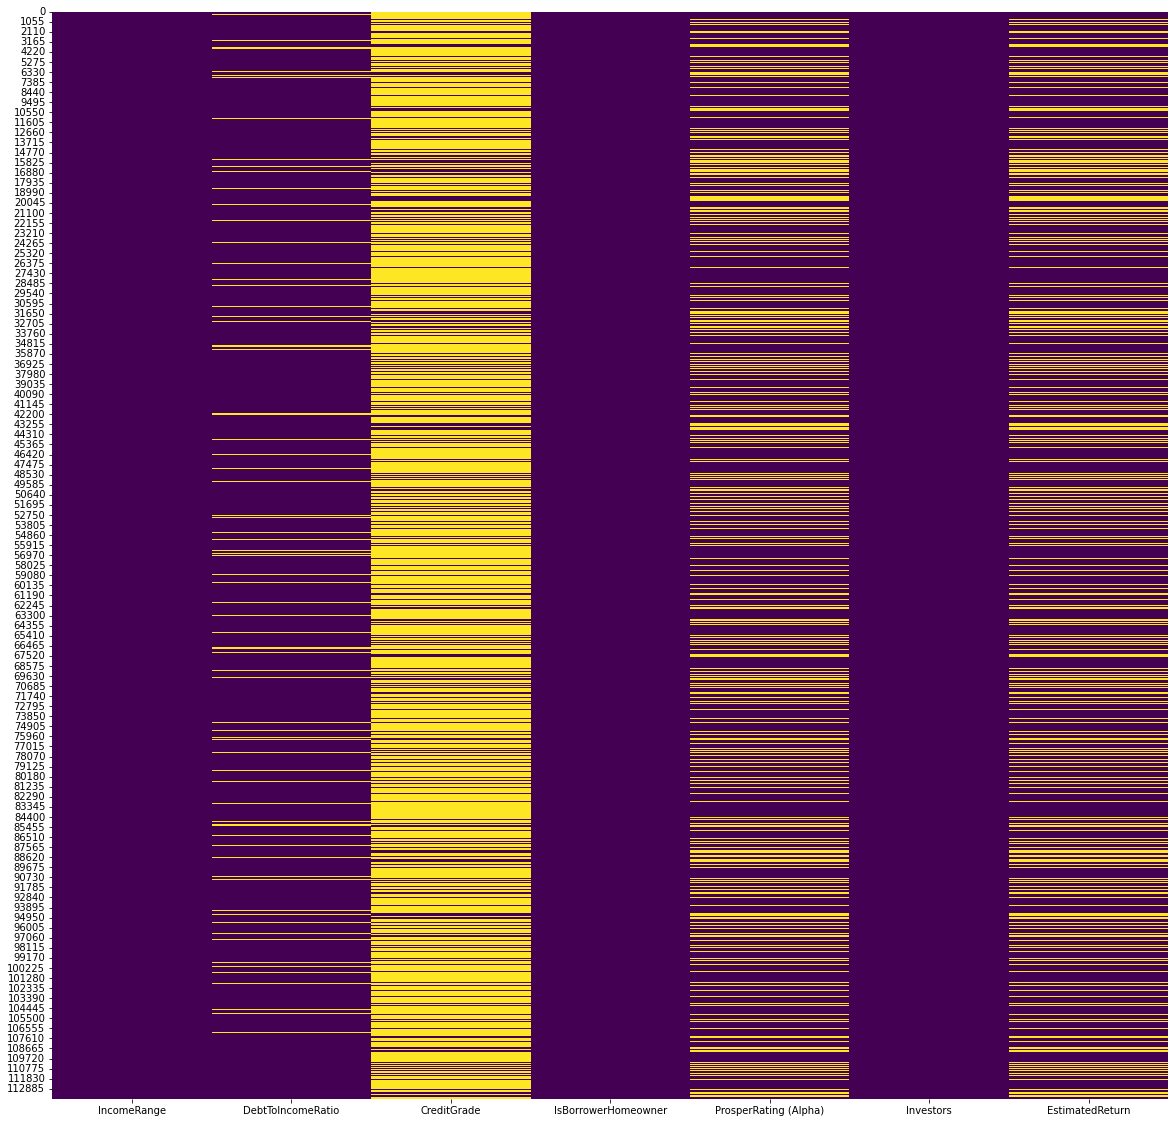

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(features_interest.isnull(), cbar = False, cmap='viridis')

# **Univariate Exploration**

## **Estimated Return**

Let's start by getting a closer look at our feature of intrests beginning with the estimated returns.

In [14]:
features_interest.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

It appears we have quite a few empty cells since the total number of rows is over 100,000.

The range of estimated returns is -18% to 28%.

From the quartile distribution I expect to see a possible right skewed distribution plot.

Let's drop the null rows and proceed with a histogram plot.

In [15]:
# drop null rows without an estimated return
features_interest.EstimatedReturn.dropna(axis = 0, inplace = True)

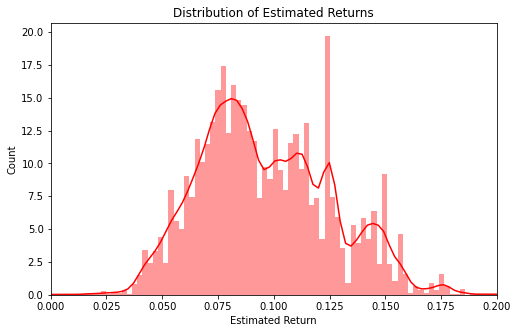

In [16]:
# histogram plot
plt.figure(figsize = [8,5])
sns.distplot(features_interest.EstimatedReturn, kde = True, bins = 200, color='red')
# zoom in on histogram
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Returns');

It appears most of our loans have an estimated return between 0% and 20%, let's zoom in on this distribution.

Our quartile analysis appears to be correct as the distribution is right skewed.

It also looks like there are some peaks in some standard values such as 5%, 7.5%, 12.5%, and 15%. Most curiously the largest bin falls right around 12.5%.

# **Prosper Credit Ratings for a Person**

Now that we have a high level overview of what the returns on the platform look like, let's see if there is a similar or distribution for the borrower's prosper/credit grade.

In [17]:
features_interest['ProsperRating (Alpha)'].describe(), features_interest['ProsperRating (Alpha)'].value_counts()

(count     84853
 unique        7
 top           C
 freq      18345
 Name: ProsperRating (Alpha), dtype: object,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64)

In [18]:
features_interest['CreditGrade'].describe(), features_interest['CreditGrade'].value_counts()

(count     28953
 unique        8
 top           C
 freq       5649
 Name: CreditGrade, dtype: object,
 C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64)

From the feature descriptions, it looks like Prosper transitioned to a "Prosper Rating" after 2009 to differentiate themselves from the industry standard "Credit Grade.

For exploratory purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In the future we may want to look at estimated returns of the pre-2009 "Credit Grade" to see how it compares with the post-2009 "Prosper Rating" to validate if they truly are equivalent or if Prosper skewed their credit rating in some way.

In [19]:
# replace NC with HR
features_interest['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
features_interest['ProsperRating (Alpha)'].fillna("", inplace = True)
features_interest['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
features_interest['ProsperRatingCombined'] = features_interest['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
features_interest = features_interest.query(' ProsperRatingCombined != ""')

# check values
features_interest['ProsperRatingCombined'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: ProsperRatingCombined, dtype: int64

We could have a potential issue with two 'A' grades combining to make an 'AA' grade. Let's double check the number of values before and after to make sure we didn't erroneously create 'AA' grades.

In [20]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
features_interest['ProsperRatingCombined'] = features_interest['ProsperRatingCombined'].astype(ordered_var)

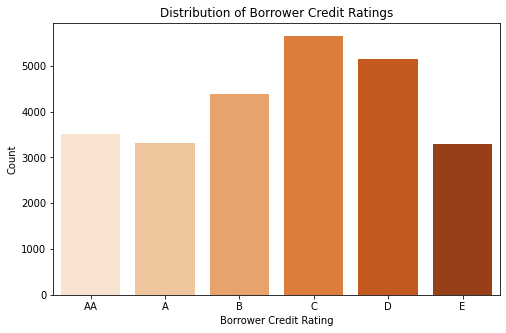

In [21]:
plt.figure(figsize = [8, 5])
sns.countplot(data = features_interest, x = 'ProsperRatingCombined', palette = "Oranges")
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');

The distribution of credit ratings is skewed to the right which coincides with our observation of estimated return distribution also being skewed to the right

This could mean that for a particular credit rating we have a range of possible estimated returns, let's look into this in our bivariate visualizations.


# **Income Range**

Let's continue our exploration by looking at a couple of the underwriting features for borrowers to be assigned these Credit Ratings. We'll start with taking a look at Income Ranges.

In [22]:
features_interest.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

To simplify our visualization, let's combine the "Not employed", "Not displayed", and "$0" categories together.

In [23]:
features_interest['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [24]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
features_interest['IncomeRange'] = features_interest['IncomeRange'].astype(ordered_var)

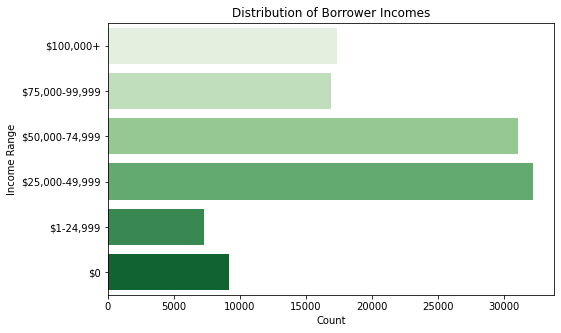

In [25]:
# bar chart
plt.figure(figsize = [8, 5])
sns.countplot(data = features_interest, y = 'IncomeRange', palette = "Greens")
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Borrower Incomes');

Its interesting to see that the number of borrowers for the 25k to 49k is the same as 50k to 74k. The amount of borrowers having income range 75k-100k are the same as the borrowers having income over 100k.

# **Debt to Income Ratio**

Of course your income is only part of the picture, let's see what the borrower's Debt to Income Ratio is like. I imagine a creditor wants to make sure you're not overleveraged in the event you have a loss of income and are unable to repay all of your debts.

In [26]:
features_interest.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

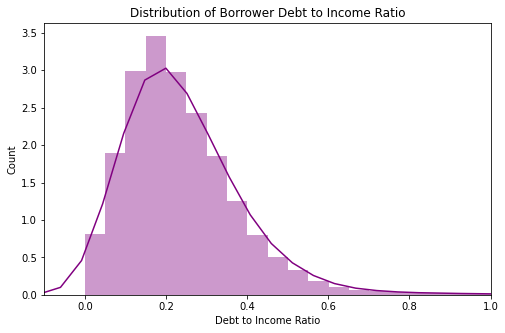

In [27]:
plt.figure(figsize = [8,5])
sns.distplot(features_interest.DebtToIncomeRatio, kde = True, bins = 200, color='Purple')
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

It appears that most borrowers who apply for a loan have a debt to income ratio around 20%. 

# **Bivariate Exploration**

## **Quantitative vs. Quantitative**

First, let's look at the pairwise correlation between the numeric features we are interested in.

In [28]:
features_interest.columns

Index(['IncomeRange', 'DebtToIncomeRatio', 'CreditGrade',
       'IsBorrowerHomeowner', 'ProsperRating (Alpha)', 'Investors',
       'EstimatedReturn', 'ProsperRatingCombined'],
      dtype='object')

In [29]:
# numeric and categorical variables
numeric_vars = ['DebtToIncomeRatio', 'EstimatedReturn', 'Investors']
categoric_vars = ['IncomeRange', 'ProsperRatingCombined','IsBorrowerHomeowner','CreditGrade']

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='Investors'>

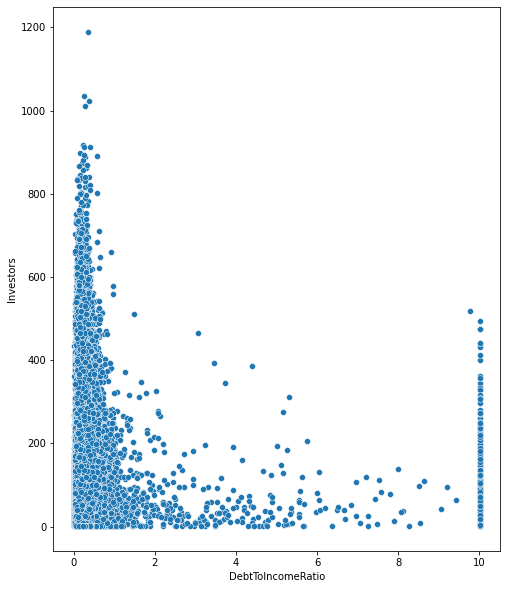

In [30]:
plt.figure(figsize=(8,10))
sns.scatterplot(data=features_interest, x='DebtToIncomeRatio',y='Investors')

The scatter plot explains how investors mostly invest in the range of the people with debt to income ratio of 0-25%. Certain investors can be found investing in the range of 25-70% but the number of investors is really less compared to those investing for the previous range. 

A decent amount of investors are inesting in the deb to income ratio of 10.

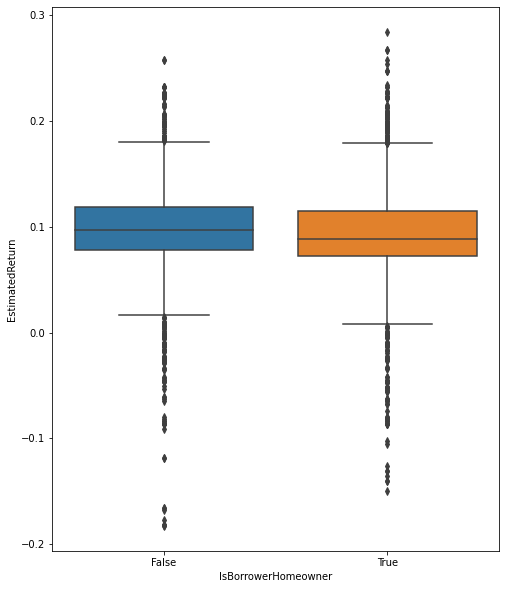

In [31]:
plt.figure(figsize=(8,10))
sns.boxplot(data=features_interest, x='IsBorrowerHomeowner',y='EstimatedReturn');

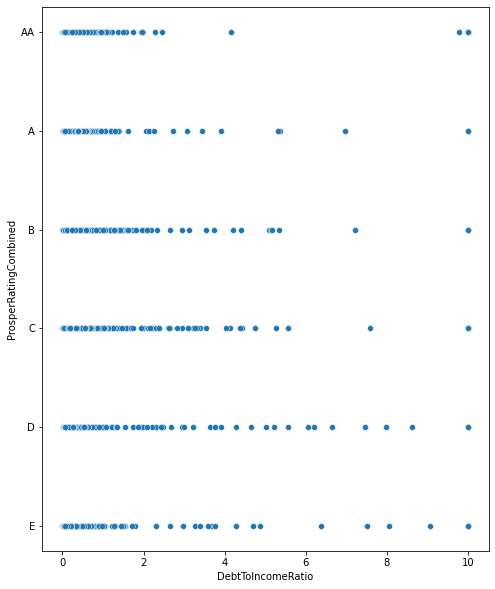

In [32]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='DebtToIncomeRatio', y='ProsperRatingCombined', data=features_interest);

The people with prosperity ratings of C and D have the highest Debt to Income Ratio whereas A and B have the lowest in the range of 0-40% mostly

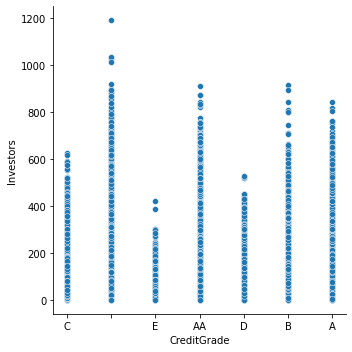

In [33]:
sns.relplot(
    y='Investors', 
    x='CreditGrade', 
    data=features_interest, 
    kind='scatter');

Investors tend to invest for the loans of the people with credit grade of AA or A or B, The grades of C, D and E have far less investors to them. This implies having a better credit score will always have more chances of getting you more investors.

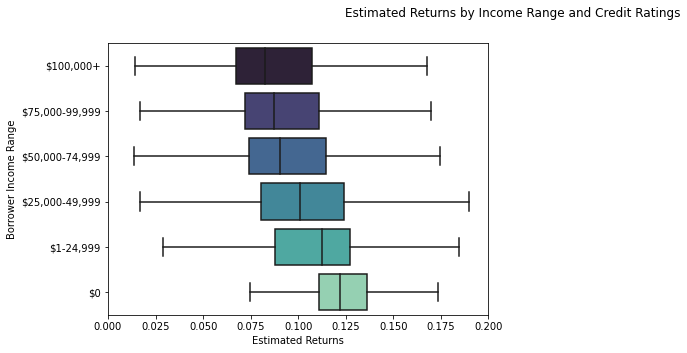

In [34]:
# boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = features_interest, y = 'IncomeRange', x = 'EstimatedReturn', palette = "mako", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')


plt.suptitle('Estimated Returns by Income Range and Credit Ratings');

From these boxplot, we're able to clearly see that as the borrowers income increases, the median estimated return decreases.

We can speculate the reasoning that as income increases, the ability to repay the loan also increases, so to adjust for the higher risk, the interest rate for the loan also increases.

Also, creditors typically compete for these high income borrowers which drive the highest credit rating interest rates down.

It's interesting to see that the width and whiskers of the boxplots shrink as credit rating increases. This suggests that the expected returns for this feature is much more predictable vs the lower credit ratings.

# **Qualitative vs. Qualitiative**

Let's continue to explore this thread by also plotting the credit score along with the income range.

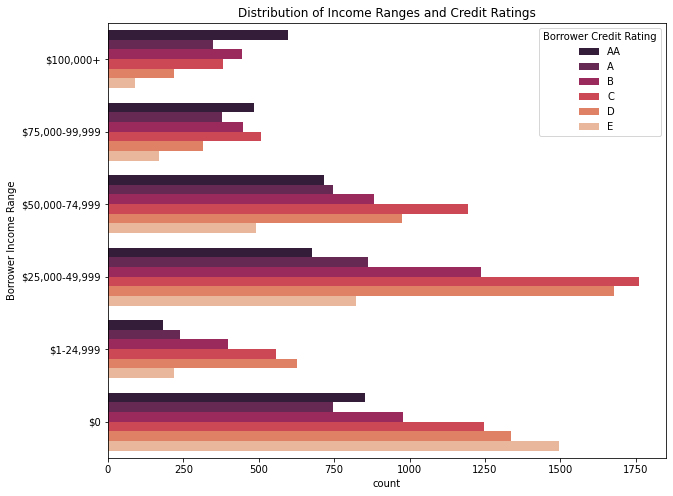

In [35]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sns.countplot(data = features_interest, y = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'rocket')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

From this clustered bar chart, we can see the trend of higher incomes correlate to a higher credit rating qualifying the borrower for the best (lowest) interest rates.

Having an income of $75k+ doesn't automatically guarantee the best credit ratings. I'm curious to see in the multivariate analysis what other factors play a big role in determining one's credit rating.



# **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

From our box plots, we saw a trend of median estimated returns decrease as the borrowers income range increased. This makes intuitive sense as borrowers with a higher income can demand the most competetive rates from creditors. The overlap in our boxplot suggests that borrowers in any income range (except 0) can produce the same estimated return for an investor. The trend between lower estimated returns and higher credit ratings was much more apparent with narrowing quartiles and lower medians.

From our clustered bar chart, we peeled back another layer to look at credit ratings and income ranges. This revealed that the previous trend of high income equating to better credit ratings, however there are some interesting cases where a high number of borrowers with no income qualified for the highest credit ratings. Also, we saw that borrowers with incomes of greater than 75k can still be considered "High Risk" borrowers.